In [3]:
import numpy as np
import matplotlib.pyplot as plt
from ler.rates import LeR
from ler.utils import get_param_from_json

Setting multiprocessing start method to 'fork'


In [2]:
import ler
import gwsnr
print(f"ler version: {ler.__version__}")
print(f"gwsnr version: {gwsnr.__version__}")

ler version: 0.4.0
gwsnr version: 0.3.2


## MEDIAN

In [3]:
ler = LeR(npool=8,
          verbose=False, 
          event_type='BBH',
          source_priors= {'merger_rate_density': 'merger_rate_density_bbh_popI_II_oguri2018'},
          source_priors_params= {'merger_rate_density': {'R0': 2.39e-08, 'b2': 1.6, 'b3': 2.0, 'b4': 30}},
          psds={'L1':'o4_psd.txt', 'H1':'o4_psd.txt'},
          snr_type="interpolation",
          )

interpolation for each mass_ratios: 100%|███████████████████████████| 50/50 [01:11<00:00,  1.42s/it]


## Unlensed

In [8]:
# snr_cut=8.0
ler.selecting_n_unlensed_detectable_events(size=20000, batch_size=200000,snr_threshold=8.0, output_jsonfile='n_unlensed_detectable_bbh_O4psd_median.json', meta_data_file='n_unlensed_detectable_bbh_meta_O4psd_median.json', resume=True);

collected number of detectable events =  10000
given detectability_condition == 'step_function'
collected number of detectable events =  10278
total number of events =  7386219.0
total rate (yr^-1): 144.05317948279597
given detectability_condition == 'step_function'
collected number of detectable events =  10544
total number of events =  7586219.0
total rate (yr^-1): 143.8853033115929
given detectability_condition == 'step_function'
collected number of detectable events =  10821
total number of events =  7786219.0
total rate (yr^-1): 143.8723036383584
given detectability_condition == 'step_function'
collected number of detectable events =  11098
total number of events =  7986219.0
total rate (yr^-1): 143.8599550703958
given detectability_condition == 'step_function'
collected number of detectable events =  11363
total number of events =  8186219.0
total rate (yr^-1): 143.69645792797235
given detectability_condition == 'step_function'
collected number of detectable events =  11648
total

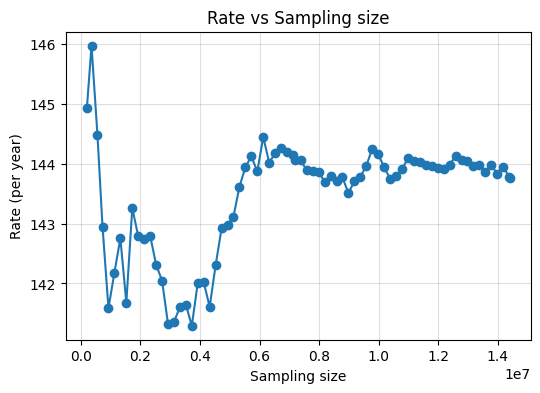

In [14]:
# let's see how rate varies with sampling size
meta_data = get_param_from_json('ler_data/n_unlensed_detectable_bbh_meta_O4psd_median.json')
# plot the rate vs sampling size
plt.figure(figsize=(6,4))
plt.plot(meta_data['events_total'], meta_data['total_rate'], 'o-')
plt.xlabel('Sampling size')
plt.ylabel('Rate (per year)')
plt.title('Rate vs Sampling size')
plt.grid(alpha=0.4)
plt.show()

In [10]:
# select only events after sampling size of 
idx = np.where(meta_data['events_total'] > 1e7)[0]
# take average 
rate_unlensed_median = np.mean(meta_data['total_rate'][idx])
print('Rate (per year) =', rate_unlensed_median)

Rate (per year) = 143.940150873906


## Lensed

In [14]:
# snr_cut=8.0
# time will take long time sample
ler.selecting_n_lensed_detectable_events(size=2000, batch_size=200000,snr_threshold=8.0, num_img=2, output_jsonfile='n_lensed_detectable_bbh_O4psd_median.json', meta_data_file='n_lensed_detectable_bbh_meta_O4psd_median.json', resume=True);

collected number of detectable events =  1000


100%|█████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 88.84it/s]


given detectability_condition == step_function
collected number of detectable events =  1273
total number of events =  889655.0
total rate (yr^-1): 0.324745690621992


100%|█████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 72.89it/s]


given detectability_condition == step_function
collected number of detectable events =  1544
total number of events =  1089655.0
total rate (yr^-1): 0.32158434364435634


100%|█████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 78.14it/s]


given detectability_condition == step_function
collected number of detectable events =  1825
total number of events =  1289655.0
total rate (yr^-1): 0.32116332054552604


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 50.89it/s]


given detectability_condition == step_function
collected number of detectable events =  2110
total number of events =  1489655.0
total rate (yr^-1): 0.32146476182930694
storing detectable lensed params in ./ler_data/n_lensed_detectable_bbh_O4psd_median.json
storing meta data in ./ler_data/n_lensed_detectable_bbh_meta_O4psd_median.json

 trmming final result to size=2000
collected number of detectable events =  2000
total number of events =  1411995.0
total lensed event rate (yr^-1): 0.3214648211738034


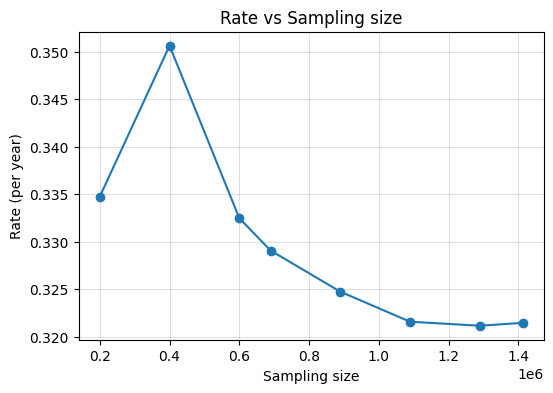

In [15]:
# let's see how rate varies with sampling size
meta_data = get_param_from_json('ler_data/n_lensed_detectable_bbh_meta_O4psd_median.json')
# plot the rate vs sampling size
plt.figure(figsize=(6,4))
plt.plot(meta_data['events_total'], meta_data['total_rate'], 'o-')
plt.xlabel('Sampling size')
plt.ylabel('Rate (per year)')
plt.title('Rate vs Sampling size')
plt.grid(alpha=0.4)
plt.show()

In [16]:
# select only events after sampling size of 
idx = np.where(meta_data['events_total'] > 1e6)[0]
# take average 
rate_lensed_median = np.mean(meta_data['total_rate'][idx])
print('Rate (per year) =', rate_lensed_median)

Rate (per year) = 0.32140416178789527


In [17]:
rate_unlensed_median/rate_lensed_median, rate_unlensed_median, rate_lensed_median

(447.84781277629077, 143.940150873906, 0.32140416178789527)

## LOW

In [18]:
ler = LeR(npool=8,
          verbose=False, 
          event_type='BBH',
          source_priors= {'merger_rate_density': 'merger_rate_density_bbh_popI_II_oguri2018'},
          source_priors_params= {'merger_rate_density': {'R0': (2.39-0.86)*1e-08, 'b2': 1.6, 'b3': 2.0, 'b4': 30}},
          psds={'L1':'o4_psd.txt', 'H1':'o4_psd.txt'},
          snr_type="interpolation",
          )

In [20]:
# snr_cut=8.0
ler.selecting_n_unlensed_detectable_events(size=20000, batch_size=200000,snr_threshold=8.0, output_jsonfile='n_unlensed_detectable_bbh_O4psd_low.json', meta_data_file='n_unlensed_detectable_bbh_meta_O4psd_low.json', resume=False);

removing ./ler_data/n_unlensed_detectable_bbh_O4psd_low.json and ./ler_data/n_unlensed_detectable_bbh_meta_O4psd_low.json if they exist
collected number of detectable events =  0
given detectability_condition == 'step_function'
collected number of detectable events =  281
total number of events =  200000
total rate (yr^-1): 93.1121316681792
given detectability_condition == 'step_function'
collected number of detectable events =  540
total number of events =  400000
total rate (yr^-1): 89.46717277725404
given detectability_condition == 'step_function'
collected number of detectable events =  815
total number of events =  600000
total rate (yr^-1): 90.01943927587907
given detectability_condition == 'step_function'
collected number of detectable events =  1101
total number of events =  800000
total rate (yr^-1): 91.20681224792287
given detectability_condition == 'step_function'
collected number of detectable events =  1385
total number of events =  1000000
total rate (yr^-1): 91.786692071

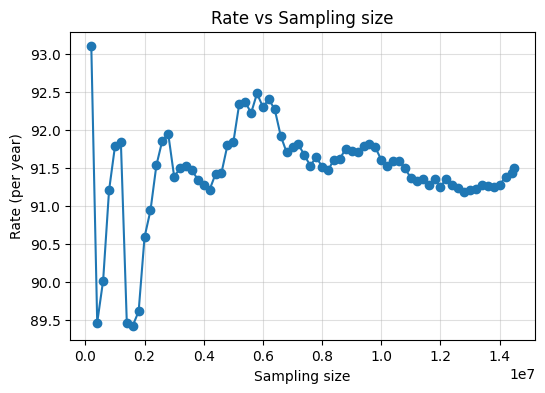

In [9]:
# let's see how rate varies with sampling size
meta_data = get_param_from_json('ler_data/n_unlensed_detectable_bbh_meta_O4psd_low.json')
# plot the rate vs sampling size
plt.figure(figsize=(6,4))
plt.plot(meta_data['events_total'], meta_data['total_rate'], 'o-')
plt.xlabel('Sampling size')
plt.ylabel('Rate (per year)')
plt.title('Rate vs Sampling size')
plt.grid(alpha=0.4)
plt.show()

In [10]:
# select only events after sampling size of 
idx = np.where(meta_data['events_total'] > 1.2e7)[0]
# take average 
rate_unlensed_low = np.mean(meta_data['total_rate'][idx])
print('Rate (per year) =', rate_unlensed_low)

Rate (per year) = 91.30240735549638


In [26]:
# snr_cut=8.0
# time will take long time sample
ler.selecting_n_lensed_detectable_events(size=10000, batch_size=200000,snr_threshold=8.0, num_img=2, output_jsonfile='n_lensed_detectable_bbh_O4psd_low.json', meta_data_file='n_lensed_detectable_bbh_meta_O4psd_low.json', resume=True)

collected number of detectable events =  1734


100%|████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 101.06it/s]


given detectability_condition == step_function
collected number of detectable events =  2024
total number of events =  1400000
total rate (yr^-1): 0.21004513127541477


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 62.71it/s]


given detectability_condition == step_function
collected number of detectable events =  2310
total number of events =  1600000
total rate (yr^-1): 0.20975974386879057


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 58.14it/s]


given detectability_condition == step_function
collected number of detectable events =  2581
total number of events =  1800000
total rate (yr^-1): 0.20832704143351555


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 68.16it/s]


given detectability_condition == step_function
collected number of detectable events =  2851
total number of events =  2000000
total rate (yr^-1): 0.2071082354181548


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 55.02it/s]


given detectability_condition == step_function
collected number of detectable events =  3164
total number of events =  2200000
total rate (yr^-1): 0.20895075312108724


 20%|██████████▌                                           | 39127/200000 [00:08<00:36, 4456.08it/s]


KeyboardInterrupt: 

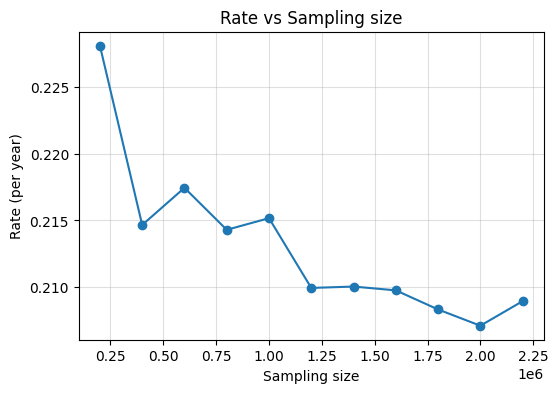

In [11]:
# let's see how rate varies with sampling size
meta_data = get_param_from_json('ler_data/n_lensed_detectable_bbh_meta_O4psd_low.json')
# plot the rate vs sampling size
plt.figure(figsize=(6,4))
plt.plot(meta_data['events_total'], meta_data['total_rate'], 'o-')
plt.xlabel('Sampling size')
plt.ylabel('Rate (per year)')
plt.title('Rate vs Sampling size')
plt.grid(alpha=0.4)
plt.show()

In [12]:
# select only events after sampling size of 
idx = np.where(meta_data['events_total'] > 1.5e6)[0]
# take average 
rate_lensed_low = np.mean(meta_data['total_rate'][idx])
print('Rate (per year) =', rate_lensed_low)

Rate (per year) = 0.20853644346038705


In [13]:
rate_unlensed_low/rate_lensed_low, rate_unlensed_low, rate_lensed_low

(437.82470747296463, 91.30240735549638, 0.20853644346038705)

## HIGH

In [31]:
ler = LeR(npool=8,
          verbose=False, 
          event_type='BBH',
          source_priors= {'merger_rate_density': 'merger_rate_density_bbh_popI_II_oguri2018'},
          source_priors_params= {'merger_rate_density': {'R0': (2.39+1.49)*1e-08, 'b2': 1.6, 'b3': 2.0, 'b4': 30}},
          psds={'L1':'o4_psd.txt', 'H1':'o4_psd.txt'},
          snr_type="interpolation",
          )

In [35]:
# snr_cut=8.0
ler.selecting_n_unlensed_detectable_events(size=20000, batch_size=200000,snr_threshold=8.0, output_jsonfile='n_unlensed_detectable_bbh_O4psd_high.json', meta_data_file='n_unlensed_detectable_bbh_meta_O4psd_high.json', resume=True);

collected number of detectable events =  10000
given detectability_condition == 'step_function'
collected number of detectable events =  10303
total number of events =  7395683.0
total rate (yr^-1): 234.12923811432395
given detectability_condition == 'step_function'
collected number of detectable events =  10588
total number of events =  7595683.0
total rate (yr^-1): 234.27035787145934
given detectability_condition == 'step_function'
collected number of detectable events =  10833
total number of events =  7795683.0
total rate (yr^-1): 233.54190161719785
given detectability_condition == 'step_function'
collected number of detectable events =  11126
total number of events =  7995683.0
total rate (yr^-1): 233.85880593230672
given detectability_condition == 'step_function'
collected number of detectable events =  11401
total number of events =  8195683.0
total rate (yr^-1): 233.79113184340414
given detectability_condition == 'step_function'
collected number of detectable events =  11675
to

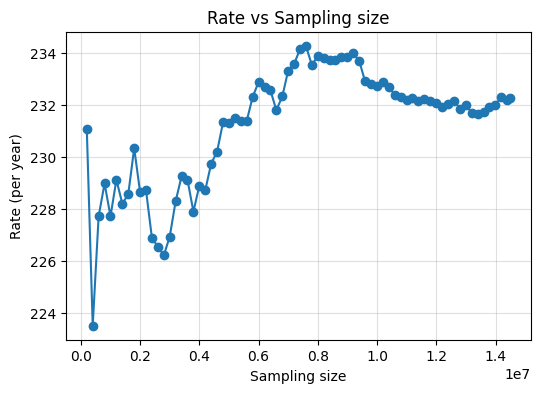

In [4]:
# let's see how rate varies with sampling size
meta_data = get_param_from_json('ler_data/n_unlensed_detectable_bbh_meta_O4psd_high.json')
# plot the rate vs sampling size
plt.figure(figsize=(6,4))
plt.plot(meta_data['events_total'], meta_data['total_rate'], 'o-')
plt.xlabel('Sampling size')
plt.ylabel('Rate (per year)')
plt.title('Rate vs Sampling size')
plt.grid(alpha=0.4)
plt.show()

In [5]:
# select only events after sampling size of 
idx = np.where(meta_data['events_total'] > 1.2e7)[0]
# take average 
rate_unlensed_high = np.mean(meta_data['total_rate'][idx])
print('Rate (per year) =', rate_unlensed_high)

Rate (per year) = 231.98116372706315


In [42]:
# snr_cut=8.0
# time will take long time sample
ler.selecting_n_lensed_detectable_events(size=10000, batch_size=200000,snr_threshold=8.0, num_img=2, output_jsonfile='n_lensed_detectable_bbh_O4psd_high.json', meta_data_file='n_lensed_detectable_bbh_meta_O4psd_high.json', resume=True)

collected number of detectable events =  1748


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 69.74it/s]


given detectability_condition == step_function
collected number of detectable events =  2037
total number of events =  1400000
total rate (yr^-1): 0.5360847276289484


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 58.02it/s]


given detectability_condition == step_function
collected number of detectable events =  2335
total number of events =  1600000
total rate (yr^-1): 0.5376966662429529


  9%|████▋                                                 | 17270/200000 [00:03<00:41, 4391.03it/s]


KeyboardInterrupt: 

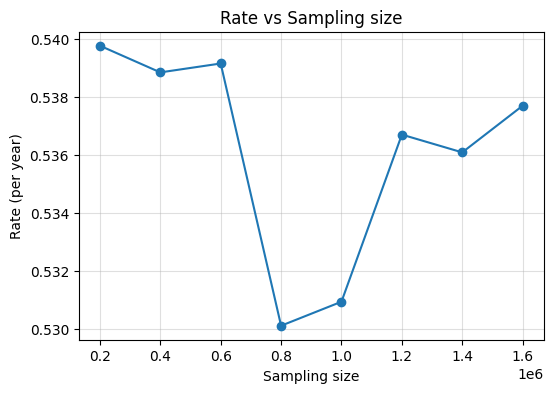

In [6]:
# let's see how rate varies with sampling size
meta_data = get_param_from_json('ler_data/n_lensed_detectable_bbh_meta_O4psd_high.json')
# plot the rate vs sampling size
plt.figure(figsize=(6,4))
plt.plot(meta_data['events_total'], meta_data['total_rate'], 'o-')
plt.xlabel('Sampling size')
plt.ylabel('Rate (per year)')
plt.title('Rate vs Sampling size')
plt.grid(alpha=0.4)
plt.show()

In [7]:
# select only events after sampling size of 
idx = np.where(meta_data['events_total'] > 1.0e6)[0]
# take average 
rate_lensed_high = np.mean(meta_data['total_rate'][idx])
print('Rate (per year) =', rate_lensed_high)

Rate (per year) = 0.5368267311179346


In [8]:
rate_unlensed_high/rate_lensed_high, rate_unlensed_high, rate_lensed_high

(432.13415107695073, 231.98116372706315, 0.5368267311179346)

In [24]:
10.694-3.427

7.267000000000001